In [ ]:
# EDA: Exploratory Data Analysis for daily weather.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import os
print("[INFO] Current working directory:", os.getcwd())
# Display configuration
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Read data
file_path = Path("../../data/raw/openmeteo_historical_daily.csv")
df = pd.read_csv(file_path, parse_dates=["date"])
print("[INFO] Data loaded:", df.shape)

[INFO] Current working directory: c:\Users\ADMIN\MyProject\School_Projects\WeatherForecastML-DM\notebooks
[INFO] Data loaded: (14976, 67)


In [2]:
#1. View overall information
print("\n[INFO] Data types:")
print(df.dtypes)
print("\n[INFO] First rows:")
print(df.head())


[INFO] Data types:
date                           datetime64[ns, UTC]
weather_code                               float64
temperature_2m_max                         float64
temperature_2m_mean                        float64
temperature_2m_min                         float64
                                      ...         
et0_fao_evapotranspiration                 float64
wind_direction_10m_dominant                float64
wind_gusts_10m_max                         float64
wind_speed_10m_max                         float64
shortwave_radiation_sum                    float64
Length: 67, dtype: object

[INFO] First rows:
                       date  weather_code  temperature_2m_max  \
0 1979-12-31 17:00:00+00:00          51.0           27.761000   
1 1980-01-01 17:00:00+00:00           3.0           27.911001   
2 1980-01-02 17:00:00+00:00           3.0           27.061000   
3 1980-01-03 17:00:00+00:00          61.0           22.211000   
4 1980-01-04 17:00:00+00:00          51.0       

In [3]:
# 2. Checking missing value
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing, "missing_%": missing_percent})
missing_df = missing_df[missing_df["missing_count"] > 0].sort_values(by="missing_count", ascending=False)
print("\n[INFO] Missing values:")
print(missing_df)


[INFO] Missing values:
                                missing_count  missing_%
cape_mean                               14976      100.0
cape_max                                14976      100.0
cape_min                                14976      100.0
precipitation_probability_min           14976      100.0
precipitation_probability_mean          14976      100.0
updraft_max                             14976      100.0
visibility_mean                         14976      100.0
visibility_min                          14976      100.0
visibility_max                          14976      100.0
soil_moisture_0_to_10cm_mean            14976      100.0


{
    "weather_code": {
        "strong_positive": [
        ],
        "strong_negative": [
        ]
    },
    "temperature_2m_max": {
        "strong_positive": [
            ["temperature_2m_mean", 0.974],
            ["temperature_2m_min", 0.896],
            ["apparent_temperature_max", 0.986],
            ["apparent_temperature_min", 0.906],
            ["apparent_temperature_mean", 0.961],
            ["dew_point_2m_mean", 0.905],
            ["dew_point_2m_max", 0.908],
            ["dew_point_2m_min", 0.885],
            ["growing_degree_days_base_0_limit_50", 0.974],
            ["soil_temperature_7_to_28cm_mean", 0.917],
            ["soil_temperature_0_to_7cm_mean", 0.96],
            ["soil_temperature_0_to_100cm_mean", 0.834],
            ["wet_bulb_temperature_2m_min", 0.905],
            ["wet_bulb_temperature_2m_max", 0.949],
            ["wet_bulb_temperature_2m_mean", 0.938]
        ],
        "strong_negative": [
            ["pressure_msl_min", -0.855],
         

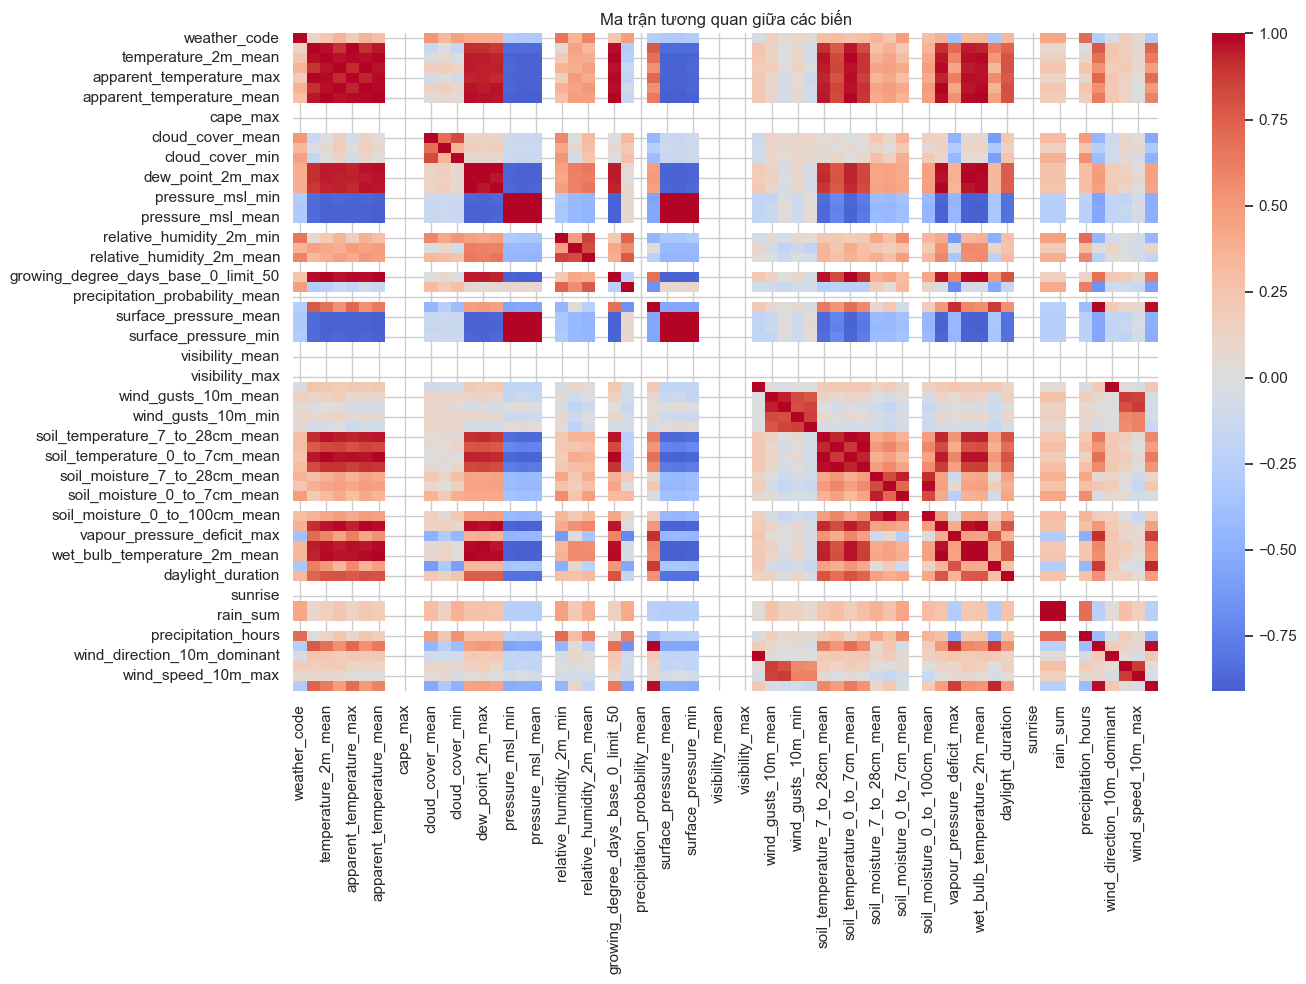

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

# df là DataFrame
cor = df.corr(numeric_only=True)

# Ngưỡng tương quan mạnh
threshold = 0.8

# Tạo dictionary mới
correlation_dict = {}

# Duyệt qua từng biến (theo cột) trong ma trận tương quan
for var1 in cor.columns:
    # Khởi tạo cho mỗi biến, tách thành 2 nhóm: mạnh dương và mạnh âm
    correlation_dict[var1] = {"strong_positive": [], "strong_negative": []}
    for var2 in cor.columns:
        if var1 == var2:
            continue  # Bỏ qua khi var1 và var2 là chính nó
        
        # Lấy và làm tròn giá trị tương quan
        corr_value = round(cor.loc[var1, var2], 3)
        # Kiểm tra nếu độ lớn của tương quan vượt qua ngưỡng
        if abs(corr_value) > threshold:
            if corr_value > 0:
                correlation_dict[var1]["strong_positive"].append([var2, corr_value])
            elif corr_value < 0:
                correlation_dict[var1]["strong_negative"].append([var2, corr_value])

# Hàm tùy chỉnh in JSON đẹp
def custom_json_dump_pretty(data):
    result = "{\n"
    for key, value in data.items():
        result += f'    "{key}": {{\n'

        for sub_key in ["strong_positive", "strong_negative"]:
            result += f'        "{sub_key}": [\n'
            for pair in value[sub_key]:
                result += f'            ["{pair[0]}", {pair[1]}],\n'
            if value[sub_key]:
                result = result.rstrip(",\n") + "\n"  # Xoá dấu phẩy cuối
            result += "        ],\n"

        result = result.rstrip(",\n") + "\n    },\n"
    result = result.rstrip(",\n") + "\n}"
    return result



# In kết quả
print(custom_json_dump_pretty(correlation_dict))

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(14, 10))
sns.heatmap(cor, cmap="coolwarm", center=0)
plt.title("Ma trận tương quan giữa các biến")
plt.tight_layout()
plt.show()
